In [1]:
# import modules
import pandas as pd
import regex as re
from pandas import read_csv
from matplotlib import pyplot
from collections import Counter
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# load data
# data is derived from NYC OpenData (https://opendata.cityofnewyork.us/) using the search term
#       "Noise Complaints (in 2017)"
# The below csv file was too large for Github upload.
# The csv file is availble for download here: 
# https://drive.google.com/file/d/1Ot8n9lOBhe1J3FvOSEN8_VdxT2m69KbU/view?usp=sharing
nyc_data = pd.read_csv('nyc_noise_complaints.csv')
nyc_data.head()

,descriptor,incident_zip,created_date,location,city,:@computed_region_sbqj_enih,cross_street_2,:@computed_region_efsh_h5xi,park_facility_name,:@computed_region_92fq_4b7q,...,:@computed_region_f5dn_yrer,status,unique_key,y_coordinate_state_plane,resolution_action_updated_date,address_type,intersection_street_2,closed_date,resolution_description,facility_type
0,Loud Talking,11216.0,2022-10-09T01:06:35.000,"{'latitude': '40.681462275805295', 'human_addr...",BROOKLYN,51.0,ARLINGTON PLACE,17618.0,Unspecified,49.0,...,69.0,In Progress,55642471,187555.0,2022-10-09T01:30:59.000,ADDRESS,ARLINGTON PLACE,NaN,NaN,NaN
1,Loud Music/Party,11106.0,2022-10-09T01:06:34.000,"{'latitude': '40.762218923911455', 'human_addr...",ASTORIA,72.0,BROADWAY,16863.0,Unspecified,4.0,...,39.0,In Progress,55644467,216983.0,NaN,ADDRESS,BROADWAY,NaN,NaN,NaN
2,Loud Music/Party,11412.0,2022-10-09T01:06:30.000,"{'latitude': '40.699958940348274', 'human_addr...",SAINT ALBANS,71.0,196 STREET,15312.0,Unspecified,6.0,...,41.0,In Progress,55649428,194381.0,NaN,ADDRESS,196 STREET,NaN,NaN,NaN
3,Loud Music/Party,11209.0,2022-10-09T01:06:12.000,"{'latitude': '40.620726741563765', 'human_addr...",BROOKLYN,41.0,88 STREET,17216.0,Unspecified,44.0,...,10.0,In Progress,55643455,165425.0,2022-10-09T01:18:43.000,ADDRESS,88 STREET,NaN,NaN,NaN
4,Loud Music/Party,10003.0,2022-10-09T01:06:11.000,"{'latitude': '40.73835131489757', 'human_addre...",NEW YORK,7.0,BROADWAY,11724.0,Unspecified,50.0,...,11.0,In Progress,55646430,208278.0,2022-10-09T01:34:04.000,ADDRESS,BROADWAY,NaN,NaN,NaN


In [3]:
nyc_data.tail()

,descriptor,incident_zip,created_date,location,city,:@computed_region_sbqj_enih,cross_street_2,:@computed_region_efsh_h5xi,park_facility_name,:@computed_region_92fq_4b7q,...,:@computed_region_f5dn_yrer,status,unique_key,y_coordinate_state_plane,resolution_action_updated_date,address_type,intersection_street_2,closed_date,resolution_description,facility_type
671140,Loud Music/Party,10025.0,2021-10-01T00:03:21.000,"{'latitude': '40.79736830568546', 'human_addre...",NEW YORK,15.0,WEST 100 STREET,12422.0,Unspecified,19.0,...,20.0,Closed,52043931,229781.0,2021-10-01T00:27:00.000,ADDRESS,WEST 100 STREET,2021-10-01T00:26:53.000,The Police Department responded to the complai...,NaN
671141,Loud Talking,11206.0,2021-10-01T00:02:25.000,"{'latitude': '40.70867837750297', 'human_addre...",BROOKLYN,56.0,GRAHAM AVENUE,17213.0,Unspecified,30.0,...,36.0,Closed,52037025,197472.0,2021-10-01T00:21:21.000,ADDRESS,GRAHAM AVENUE,2021-10-01T00:21:17.000,The Police Department responded to the complai...,NaN
671142,Loud Music/Party,11211.0,2021-10-01T00:00:46.000,"{'latitude': '40.708933873120394', 'human_addr...",BROOKLYN,56.0,SOUTH 2 STREET,17613.0,Unspecified,30.0,...,36.0,Closed,52041256,197564.0,2021-10-01T00:40:32.000,ADDRESS,SOUTH 2 STREET,2021-10-01T00:40:27.000,The Police Department responded to the complai...,NaN
671143,Loud Music/Party,10453.0,2021-10-01T00:00:44.000,"{'latitude': '40.85368904676198', 'human_addre...",BRONX,29.0,EAST 180 STREET,10931.0,Unspecified,29.0,...,6.0,Closed,52035597,250314.0,2021-10-01T00:53:49.000,ADDRESS,EAST 180 STREET,2021-10-01T00:53:43.000,The Police Department responded to the complai...,NaN
671144,Banging/Pounding,10035.0,2021-10-01T00:00:04.000,"{'latitude': '40.80140331720816', 'human_addre...",NEW YORK,16.0,ALFREDO CHOCOLATE ARMENTEROS WAY,13093.0,Unspecified,35.0,...,7.0,Closed,52040915,231256.0,2021-10-01T00:13:04.000,ADDRESS,ALFREDO CHOCOLATE ARMENTEROS WAY,2021-10-01T00:13:01.000,The Police Department responded to the complai...,NaN


In [4]:
"""
QUESTION:
1.1 How many rows are in the data set?
"""
print("\n*********\n1.1 ANSWER:")
print("Number of rows:",len(nyc_data))
print("*********\n")


*********
1.1 ANSWER:
Number of rows: 671145
*********



In [5]:
"""
QUESTION:
1.2 What fraction of noise complaints deal with music? A complaint is considered to deal with 
music if it has the string "Music" present in the value of the "descriptor" column.
"""
count = 0
for row in nyc_data["descriptor"]:
  if 'Music' in row:
    count = count + 1 
print("\n*********\n1.2 ANSWER:")
print("Fraction of noise complaints dealing with music:", count/len(nyc_data))
print("*********\n")


*********
1.2 ANSWER:
Fraction of noise complaints dealing with music: 0.6228788115831899
*********



In [6]:
"""
QUESTION:
1.3 For noise complaints with creation date in 2022, what is the probability a complaint's 
status is "Closed" given that it happened in Manhattan? Complaint creation date is logged 
in column "created_date", status of a complaint is in column "status" and the borough is 
in column "borough".
"""
nyc_data1 = nyc_data[  nyc_data['complaint_type'].str.contains('Noise')  ]
print("\nNumber of Noise rows:",len(nyc_data1))
nyc_data2 = nyc_data1[nyc_data1['created_date'].str.contains('2022')  ]
print("\nNumber of Noise 2022 rows:",len(nyc_data2))
nyc_data3 = nyc_data2[nyc_data2['status'].str.contains('Closed')  ]
print("\nNumber of Noise 2022 Closed rows:",len(nyc_data3))
nyc_data4 = nyc_data3[nyc_data3['borough'].str.contains('MANHATTAN')  ]
print("\nNumber of Noise 2022 Closed MANHATTAN rows:",len(nyc_data4))
print("\n***\n1.3 ANSWER:")
print("Probability of a closed, noise complaint located in Mahahattan in 2022:", len(nyc_data4)/len(nyc_data2))
print("***\n")


Number of Noise rows: 671145

Number of Noise 2022 rows: 516605

Number of Noise 2022 Closed rows: 497256

Number of Noise 2022 Closed MANHATTAN rows: 131006

***
1.3 ANSWER:
Probability of a closed, noise complaint located in Mahahattan in 2022: 0.25359026722544303
***



In [7]:
"""
QUESTION:
1.4 How does construction noise vary across New York City? For each ZIP code, calculate 
fraction of noise complaints that are due to construction. For simplification, a 
complaint dealing with construction noise is one with with the string "Construction" 
appearing anywhere in the "descriptor" column. Once you have the fractions for each ZIP code, 
report the standard deviation. Exclude ZIP codes that do not have at least 100 complaints 
dealing with construction noise.
"""
# isolate construction noise complaints
nyc_data1 = nyc_data[  nyc_data['complaint_type'].str.contains('Noise')  ]
print("Number of Noise rows:",len(nyc_data1))
nyc_data5 = nyc_data1[nyc_data1['descriptor'].str.contains('Construction')  ]
print("Number of Construction Noise rows:",len(nyc_data5))
listy = nyc_data5['incident_zip'].unique()
print("Number of unique zipcodes:",listy.shape)
print("Dimensions of component dataframe containing only complaints due to construction noise", nyc_data5.shape)

# form dictionary of keys (zipcodes) : values (complaints)
ZIPCODES = Counter(nyc_data5['incident_zip']).keys()
COMPLAINTS = Counter(nyc_data5['incident_zip']).values()
print("\nZipcodes as Keys in Key:Value pairs:\n",ZIPCODES)
print("\nComplaints per zipcode as Values in Key:Value pairs:\n", COMPLAINTS)
zip_total_data = {'ZIP_CODE':list(ZIPCODES), 'COMPLAINTS':list(COMPLAINTS)}

# limit to at least 100 complaints, convert dictionary to dataframe of integers
construc_zips = pd.DataFrame(zip_total_data)
construc_zips_final = construc_zips[construc_zips['COMPLAINTS'] >= 100]
construc_zips_final = construc_zips_final.astype({"ZIP_CODE":"int","COMPLAINTS":"int"})


"""
print("\nZipcodes with over 100 complaints:")
print(construc_zips_final.head())
print(construc_zips_final.tail())
"""
# sum total complaints to form fractions
print(construc_zips_final['COMPLAINTS'].sum())
fractions = (construc_zips_final['COMPLAINTS']/construc_zips_final['COMPLAINTS'].sum())
# add new column for fractions
construc_zips_final['FRACTIONS'] = fractions
print(construc_zips_final.head())
print(construc_zips_final.tail())
print("\n*********\n1.4 ANSWER:")
print("Standard deviation for construction complaints in NYC zipcodes:", construc_zips_final['FRACTIONS'].std())
print("*********\n")

Number of Noise rows: 671145
Number of Construction Noise rows: 25074
Number of unique zipcodes: (191,)
Dimensions of component dataframe containing only complaints due to construction noise (25074, 36)

Zipcodes as Keys in Key:Value pairs:
 dict_keys([11231.0, 10454.0, 11234.0, 10462.0, 10034.0, 10023.0, 11249.0, 10001.0, 10031.0, 11205.0, 11377.0, 11210.0, 10128.0, 11215.0, 10458.0, 11221.0, 10033.0, 10019.0, 11356.0, 10026.0, 11233.0, 11237.0, 10459.0, 11208.0, 11102.0, 11211.0, 11101.0, 10028.0, 11232.0, 10021.0, 10467.0, 11375.0, 11372.0, 10463.0, 10025.0, 10032.0, 10011.0, 10029.0, 10469.0, 11213.0, 11355.0, 11219.0, 10016.0, 11222.0, 11104.0, 11217.0, 11368.0, 11218.0, 11378.0, 10002.0, 11358.0, 10003.0, 11224.0, 10314.0, 10065.0, 10013.0, 10027.0, 10009.0, 11201.0, 11226.0, 10310.0, 11106.0, 11223.0, 11427.0, 10306.0, 11357.0, 11204.0, 11417.0, 10014.0, 11385.0, 11235.0, 10468.0, 11214.0, 11209.0, 10472.0, 11366.0, 11229.0, 10010.0, 11436.0, 10040.0, 10038.0, 11411.0, 11206.0, 

In [8]:
"""
QUESTION:
1.5 As the population of a ZIP code increases so do the number of complaints. 
We can visualize this trend by plotting the number of complaints as a function of the 
ZIP code population. What is the slope of a line of best fit? A CSV file with the population 
data for each ZIP code can be downloaded here.
"""
# load data
# data is derived from NYC OpenData (https://opendata.cityofnewyork.us/) using the search term
#       "Modified Zip Code Tabulation Areas (MODZCTA)"
nyc_pop_data = pd.read_csv('nycpopulation.csv')




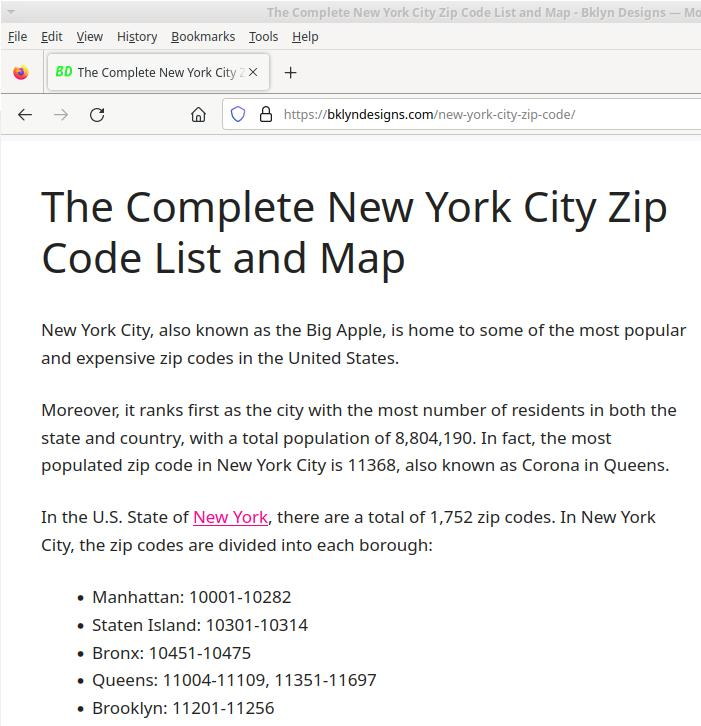

In [9]:
# limit analysis to NYC zip codes based on https://bklyndesigns.com/new-york-city-zip-code/
from IPython.display import Image
Image(filename = "nyc_zip_codes.jpg", width=500, height=500)

In [10]:
# form dataframe of true NYC zips with associated populations
nyc_pop_true_zips = nyc_pop_data[ (nyc_pop_data['ZIP_CODE'] >= 10000) & (nyc_pop_data['ZIP_CODE'] <= 11300) ]
# form dataframe of true NYC zips with associated construction complaints
construc_zips_final = construc_zips_final[construc_zips_final['ZIP_CODE'].between(10000, 11300) ]
# merge two dataframes using shared zip code column
merged_nyc_pop_zips_complaints = pd.merge(construc_zips_final, nyc_pop_true_zips, on ='ZIP_CODE' )
merged_nyc_pop_zips_complaints.head()

,ZIP_CODE,COMPLAINTS,FRACTIONS,POPULATION
0,11231,190,0.009175,33336.0
1,11234,181,0.008741,87757.0
2,10023,455,0.021972,60998.0
3,10001,388,0.018737,21102.0
4,10031,199,0.009610,56438.0


In [11]:
merged_nyc_pop_zips_complaints.tail()

,ZIP_CODE,COMPLAINTS,FRACTIONS,POPULATION
69,10451,124,0.005988,45713.0
70,10007,171,0.008258,6988.0
71,11105,102,0.004926,36688.0
72,10005,205,0.009900,7135.0
73,10456,102,0.004926,86547.0


In [12]:
# extract x and y data for regression
x = np.array(merged_nyc_pop_zips_complaints['ZIP_CODE']).reshape((-1, 1))
y = np.array(merged_nyc_pop_zips_complaints['COMPLAINTS'])
complaint_zip_model = LinearRegression().fit(x,y)
COD = complaint_zip_model.score(x,y)
intercept = complaint_zip_model.intercept_
slope = complaint_zip_model.coef_
print("\n*********\n1.5 ANSWER:")
print("Model Coefficient of Determination:",COD)
print("Model Y-intercept:",intercept)
print("Model Slope:",slope)
print("*********\n")


*********
1.5 ANSWER:
Model Coefficient of Determination: 0.08051720003040586
Model Y-intercept: 1012.1992374450942
Model Slope: [-0.07093176]
*********



Text(0.5, 0, 'Zip Code')

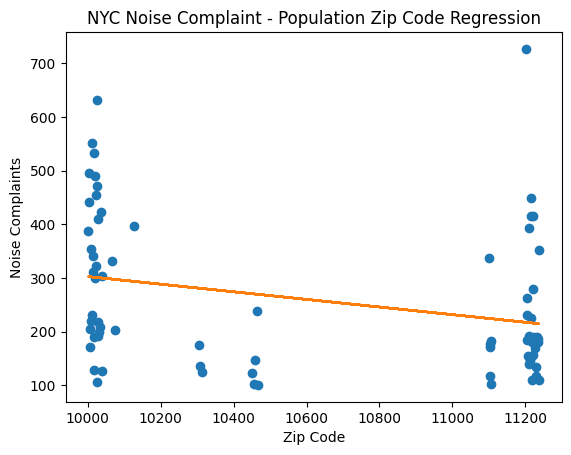

In [13]:
# plot linear regression data and best fit line
pyplot.plot(x, y, 'o')
pyplot.plot(x, slope*x + intercept)
pyplot.title("NYC Noise Complaint - Population Zip Code Regression")
pyplot.ylabel("Noise Complaints")
pyplot.xlabel("Zip Code")